In [19]:
%load_ext autoreload
%autoreload 2

import warnings

import matplotlib.pyplot as plt
import torch
from data_loader import load_mefisto_multidimensional

from famo.core import CORE
from famo.plotting import (
    plot_all_weights,
    plot_factor_correlation,
    plot_top_weights,
    plot_training_curve,
    plot_variance_explained,
    plot_weights,
)

warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = load_mefisto_multidimensional()

In [3]:
# Run model with MuData object
model = CORE(device="cuda")
model.fit(
    n_factors=7,
    data=data,
    likelihoods={
        "RNA": "Normal",
        "motif_met": "Normal",
        "motif_acc": "Normal",
    },
    factor_prior="GP",
    weight_prior="ARD_Spike_and_Slab",
    covariates_obsm_key="umap",
    lr=0.005,
    early_stopper_patience=500,
    print_every=100,
    center_groups=True,
    scale_views=False,
    scale_groups=True,
    max_epochs=10000,
    save=True,
    save_path="trained_model",
    init_factors="random",
    init_scale=0.1,
)

Setting up device...
- No device id given. Using default device: 0
- Running all computations on `cuda:0`
Fitting model...
- Checking compatibility of provided likelihoods with data.
  - RNA: Normal
  - motif_met: Normal
  - motif_acc: Normal
- Centering group_1/RNA...
- Centering group_1/motif_met...
- Centering group_1/motif_acc...


alt.Chart(...)

Initializing factors using `random` method...
{'RNA': 0.794912559618442, 'motif_met': 1.102543720190779, 'motif_acc': 1.102543720190779}
Decaying learning rate over 10000 iterations.
Setting training seed to `2408221617`.
Cleaning parameter store.
Epoch:       0 | Time:       1.12s | Loss:    1568.36
Epoch:     100 | Time:       5.80s | Loss:    1428.03
Epoch:     200 | Time:      10.42s | Loss:    1346.52
Epoch:     300 | Time:      14.94s | Loss:    1313.24
Epoch:     400 | Time:      19.45s | Loss:    1296.49
Epoch:     500 | Time:      23.97s | Loss:    1280.81
Epoch:     600 | Time:      28.49s | Loss:    1274.92
Epoch:     700 | Time:      33.01s | Loss:    1268.87
Epoch:     800 | Time:      37.54s | Loss:    1258.87
Epoch:     900 | Time:      42.20s | Loss:    1256.84
Epoch:    1000 | Time:      46.72s | Loss:    1256.43
Epoch:    1100 | Time:      51.23s | Loss:    1252.99
Epoch:    1200 | Time:      55.75s | Loss:    1249.00
Epoch:    1300 | Time:      60.42s | Loss:    1245

In [4]:
plot_training_curve(model)

alt.Chart(...)

In [5]:
plot_variance_explained(model)

alt.HConcatChart(...)

In [6]:
plot_all_weights(model)

alt.HConcatChart(...)

In [7]:
plot_weights(model, "RNA")

alt.LayerChart(...)

In [8]:
plot_weights(model, "motif_met")

alt.LayerChart(...)

In [9]:
plot_weights(model, "motif_acc")

alt.LayerChart(...)

In [10]:
plot_factor_correlation(model)

alt.HConcatChart(...)

In [11]:
plot_top_weights(model, view="RNA")

alt.HConcatChart(...)

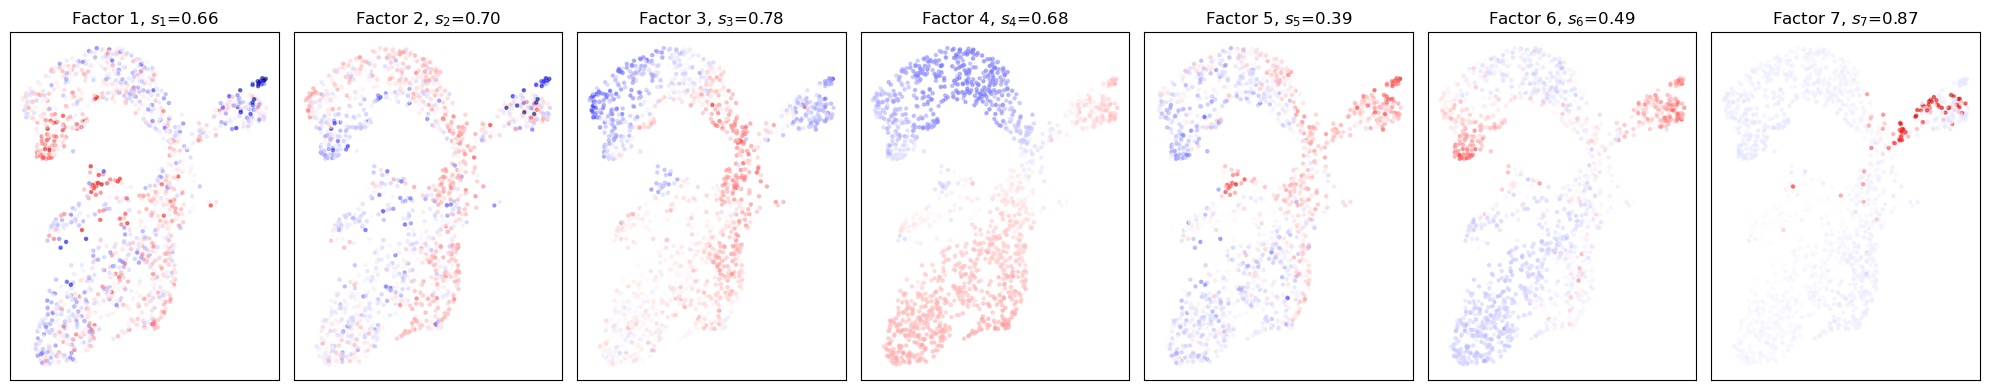

In [26]:
z = model.get_factors()['group_1']
covariates = model.covariates['group_1']

fig, axs = plt.subplots(1, 7, figsize=(20, 4))

for i in range(7):
    axs[i].scatter(covariates[:, 0], covariates[:, 1], c=z.iloc[:, i], cmap='seismic', s=5, alpha=0.5, vmax=4.0, vmin=-4.0)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(fr"Factor {i+1}, $s_{i+1}$={model.gps["group_1"].covar_module.outputscale[i].item():.2f}")

plt.tight_layout()
plt.show()

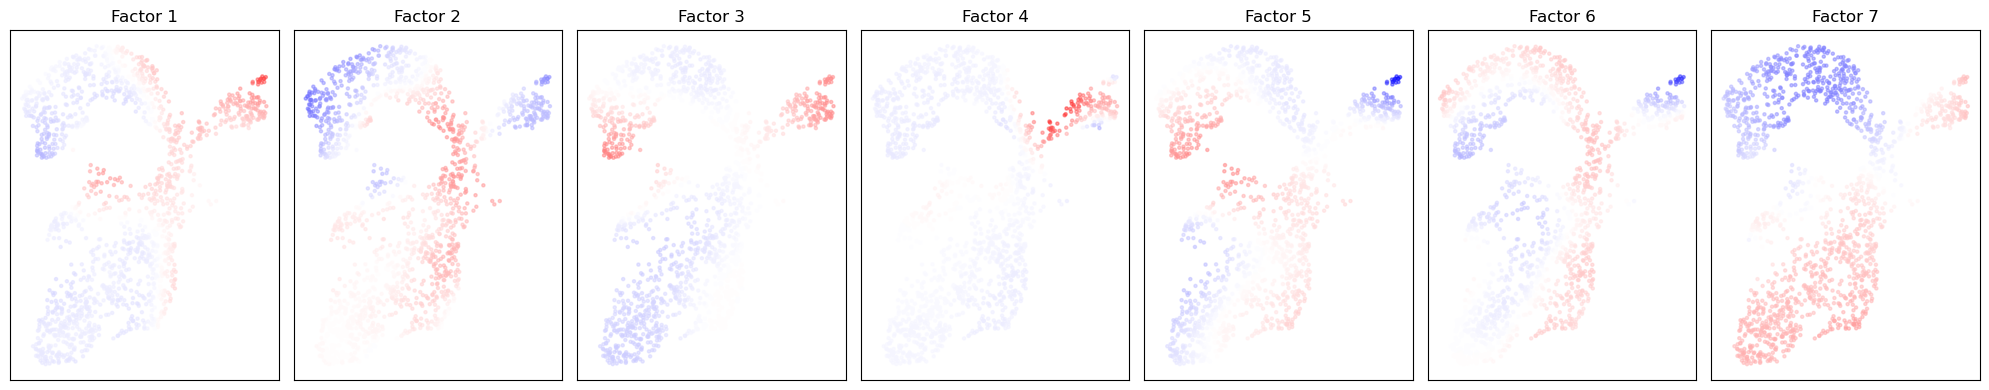

In [22]:
covariates = model.covariates['group_1']
f = model.gps["group_1"](covariates.to(model.device), prior=False).sample(torch.Size([500])).mean(axis=0).cpu().detach().numpy()

fig, axs = plt.subplots(1, 7, figsize=(20, 4))

for i in range(7):
    axs[i].scatter(covariates[:, 0], covariates[:, 1], c=f[i], cmap='seismic', s=5, alpha=0.5, vmax=4.0, vmin=-4.0)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Factor {i+1}")

plt.tight_layout()
plt.show()

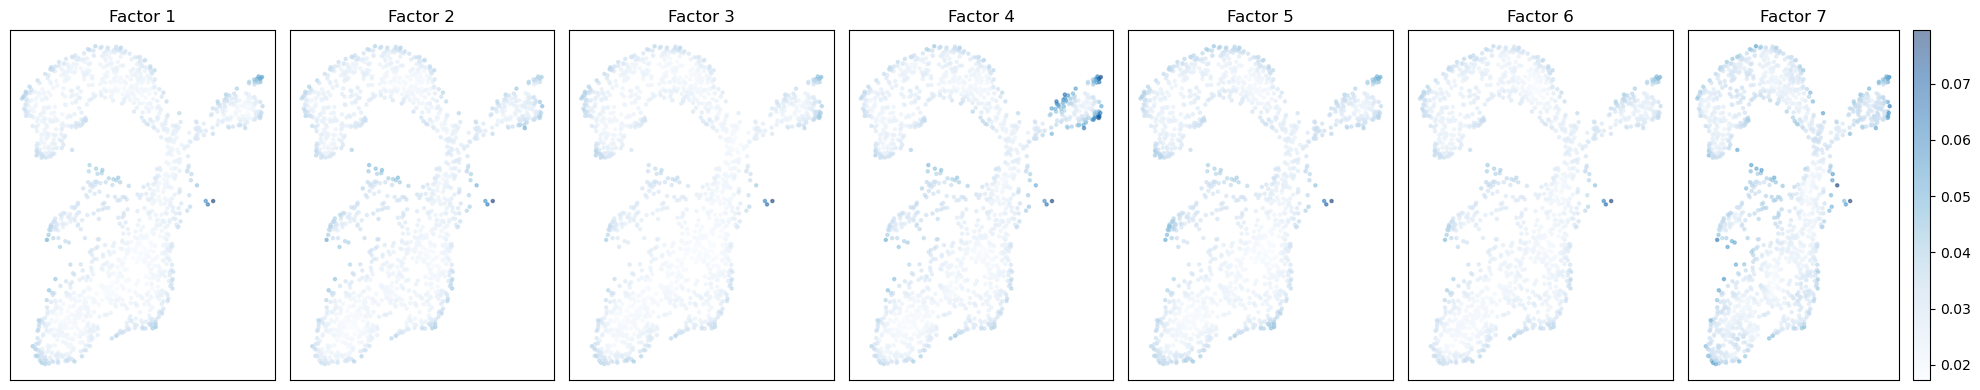

In [32]:
covariates = model.covariates['group_1']
f = model.gps["group_1"](covariates.to(model.device), prior=False).sample(torch.Size([500])).std(axis=0).cpu().detach().numpy()

fig, axs = plt.subplots(1, 7, figsize=(20, 4))

for i in range(7):
    im = axs[i].scatter(covariates[:, 0], covariates[:, 1], c=f[i], cmap='Blues', s=5, alpha=0.5)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Factor {i+1}")

plt.colorbar(im)
plt.tight_layout()
plt.show()